In [1]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("crime_data.csv");

print(df.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


# eda

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [4]:
df1=df.rename({'Unnamed: 0':'state','Murder':'murder','Assault':'assault','UrbanPop':"upop","Rape":"rape"},axis=1)
df1.head()

,state,murder,assault,upop,rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df1.drop(['state'],axis=1,inplace=True)
df1.head()

,murder,assault,upop,rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [6]:
# before standardscaler we have to remove non numeric columns

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
stscaler = StandardScaler().fit(df1)
X = stscaler.transform(df1)

In [9]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(X)
#

KMeans(n_clusters=4, random_state=0)

In [12]:
df1["Cluster"] = kmeans.predict(X)

In [13]:
df1

,murder,assault,upop,rape,Cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [14]:
df1["Cluster"].value_counts()

0    16
1    13
2    13
3     8
Name: Cluster, dtype: int64

# elbow method

In [15]:
kmeans.inertia_ #Within a cluster sum 0f square

57.55425863091104

In [16]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    dist = kmeans.inertia_
    wcss.append(dist)

In [17]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.31163939712256]

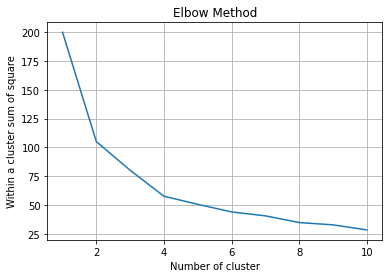

In [18]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Within a cluster sum of square")
plt.grid()

In [19]:
# from above graph n_cluster must be 6 as at 6 the graph is smooth

In [20]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=7)
clusters_new.fit(X)

KMeans(n_clusters=6, random_state=7)

In [21]:
clusters_new.labels_

array([3, 1, 1, 0, 1, 1, 4, 0, 1, 3, 4, 2, 5, 0, 2, 0, 0, 3, 2, 1, 4, 1,
       2, 3, 0, 0, 0, 1, 2, 4, 1, 5, 3, 2, 0, 0, 0, 0, 4, 3, 2, 3, 5, 4,
       2, 0, 0, 2, 2, 0])

In [22]:
#Assign clusters to the data set
df1['clusterid_new'] = clusters_new.labels_

In [23]:
df1

,murder,assault,upop,rape,Cluster,clusterid_new
0,13.2,236,58,21.2,3,3
1,10.0,263,48,44.5,1,1
2,8.1,294,80,31.0,1,1
3,8.8,190,50,19.5,3,0
4,9.0,276,91,40.6,1,1
5,7.9,204,78,38.7,1,1
6,3.3,110,77,11.1,0,4
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,1,1
9,17.4,211,60,25.8,3,3


In [24]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.23996529, -0.33082798, -0.0702524 , -0.1343076 ],
       [ 0.70371265,  1.2486992 ,  0.61366171,  1.63704764],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482],
       [ 0.83771388,  0.77462556,  1.21848371,  0.4279437 ]])

In [25]:
#What is avarage of top10 for cluster
df1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,murder,assault,upop,rape,Cluster
,,mean,mean,mean,mean,mean
0,0,6.753333,143.466667,64.533333,19.986667,0.666667
1,1,10.822222,273.777778,74.333333,36.411111,1.000000
2,2,2.680000,70.100000,51.000000,10.910000,2.000000
3,3,14.671429,251.285714,54.285714,21.685714,3.000000
4,4,4.500000,126.333333,83.500000,16.266667,0.000000
5,5,11.400000,234.666667,83.000000,25.200000,1.000000


In [26]:
df1[df1['clusterid_new']==1]

,murder,assault,upop,rape,Cluster,clusterid_new
1,10.0,263,48,44.5,1,1
2,8.1,294,80,31.0,1,1
4,9.0,276,91,40.6,1,1
5,7.9,204,78,38.7,1,1
8,15.4,335,80,31.9,1,1
19,11.3,300,67,27.8,1,1
21,12.1,255,74,35.1,1,1
27,12.2,252,81,46.0,1,1
30,11.4,285,70,32.1,1,1


In [27]:
df1[df1['clusterid_new']==2]

,murder,assault,upop,rape,Cluster,clusterid_new
11,2.6,120,54,14.2,2,2
14,2.2,56,57,11.3,2,2
18,2.1,83,51,7.8,2,2
22,2.7,72,66,14.9,2,2
28,2.1,57,56,9.5,2,2
33,0.8,45,44,7.3,2,2
40,3.8,86,45,12.8,2,2
44,2.2,48,32,11.2,2,2
47,5.7,81,39,9.3,2,2
48,2.6,53,66,10.8,2,2


In [28]:
df1["clusterid_new"].value_counts()

0    15
2    10
1     9
3     7
4     6
5     3
Name: clusterid_new, dtype: int64

# hireachical clustering

In [29]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [31]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

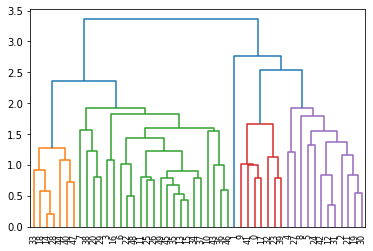

In [33]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [34]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean')

In [35]:
# save clusters for chart
y_hc = hc.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [37]:
Clusters

,Clusters
0,3
1,1
2,5
3,4
4,1
5,1
6,0
7,0
8,5
9,3


In [38]:
df1['h_clusterid'] = Clusters
df1

,murder,assault,upop,rape,Cluster,clusterid_new,h_clusterid
0,13.2,236,58,21.2,3,3,3
1,10.0,263,48,44.5,1,1,1
2,8.1,294,80,31.0,1,1,5
3,8.8,190,50,19.5,3,0,4
4,9.0,276,91,40.6,1,1,1
5,7.9,204,78,38.7,1,1,1
6,3.3,110,77,11.1,0,4,0
7,5.9,238,72,15.8,0,0,0
8,15.4,335,80,31.9,1,1,5
9,17.4,211,60,25.8,3,3,3


In [40]:
df1.sort_values("h_clusterid")

,murder,assault,upop,rape,Cluster,clusterid_new,h_clusterid
24,9.0,178,70,28.2,1,0,0
20,4.4,149,85,16.3,0,4,0
38,3.4,174,87,8.3,0,4,0
34,7.3,120,75,21.4,0,0,0
15,6.0,115,66,18.0,0,0,0
13,7.2,113,65,21.0,0,0,0
37,6.3,106,72,14.9,0,0,0
10,5.3,46,83,20.2,0,4,0
43,3.2,120,80,22.9,0,4,0
36,4.9,159,67,29.3,0,0,0


In [41]:
df1.h_clusterid.value_counts()

0    15
2    12
5     8
3     7
1     4
4     4
Name: h_clusterid, dtype: int64